# S7 galaxies

Objectives:
* Determine the characteristics of the 2nd component in the SB subset
* Determine whether emission line components with different spectral classifications lie in different regions of the WHAV* diagram.

To do:
* Show SDSS or continuum image, then BPT, then WHAV, then EW(H$\alpha$) vs. $v_{\rm gas} - v_*$. Set components 0 and 2 to have low alpha values to emphasize component 1. Repeat for all SB galaxies in S7 (except for the one with the dodgy column)

In [ ]:
%matplotlib widget

In [1]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.s7 import load_s7_galaxies
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import bpt_labels, bpt_colours
from spaxelsleuth.plotting.plottools import ncomponents_labels, ncomponents_colours
from spaxelsleuth.plotting.plottools import component_labels, component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [2]:
# Options
fig_path = "/priv/meggs3/u5708159/S7/figs/"
savefigs = True
eline_SNR_min = 5       # Minimum S/N of emission lines to accept


In [3]:
# Load the S7 sample
df = load_s7_galaxies(eline_SNR_min=eline_SNR_min,
                       sigma_gas_SNR_cut=True,
                      stekin_cut=True,
                       vgrad_cut=False)


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [4]:
# Load the SAMI sample
df_sami = load_sami_galaxies(ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=5, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)

## Remarks on individual objects: starbursts

#### NGC 5253 (yes - *caveat: limited stellar kinematics. Consider re-fitting with my own code - perhaps bin first*)
* SFR = 0.170 ± 0.004
* No comments in S7 papers.
* Distributed 2nd component. Central regions display only one component. 2nd component has $\sigma_{\rm gas} \sim 30 - 50\,\rm km\,s^{-1}$. 
* Column of bad pixels running down the centre of the image due to saturation in H$\alpha$.
* 2nd component is Seyfert-like with very low N2 ratios.
* Unfortunately, the WHAV* diagram has little utility for this object as the stellar kinematics are missing for most of the object.
* **Previous studies**:
    * High-res optical IFU study detected "accelerating ionized gas outflow from the supernebula clusters". See here: https://www.aanda.org/articles/aa/pdf/2013/02/aa20580-12.pdf
    
#### NGC 5757 (yes?)
* SFR = 5.06 ± 0.15
* Dopita+2015: *This barred spiral galaxy has a nuclear starburst with low reddening and high metallicity (Saraiva et al. 2001) embedded in spiral arms crowded with H II regions.*
* 2nd component present in nuclear regions. Has 2nd component similar to high-SFR galaxies in SAMI. Unfortunately lacking in line ratios for most spaxels, but 2nd component has SF-like line ratios.
* 2nd component is blueshifted.

#### NGC 5597 (yes)
* SFR = 0
* Exhibits S2 "spur"
* Dopita+2015: *This somewhat **tidally disturbed galaxy forms an interacting physical pair with NGC 5595**. The nuclear region forms a bar of star formation imaged with HST in the red continuum by Malkan et al. (1998). The nuclear continuum spectrum is dominated by young stars, and a broad He II l4686 feature from a **WR population** is faintly visible. A number of other H II regions are visible in the general field.*
* 2nd and 3rd component present in nuclear regions - all SF-like.
* Has 2nd component similar to high-SFR galaxies in SAMI. 2nd and 3rd component are blueshifted in some spaxels (see 2D maps).
* **(could winds be coming from WR stars?)**

#### NGC 4691 (yes - *caveat: limited stellar kinematics. Consider re-fitting with my own code - perhaps bin first*)
* SFR = 3.52 ± 0.15
* Thomas+2017: *this galaxy is dominated by **metal-rich H II regions** with an underlying post-starburst continuum. There is no sign of an AGN.*
* Extended 2nd component w/ SF line ratios.
* **Very low O1 ratios - located along the fringes of the SAMI sample, where there are many SAMI spaxels with >1 comnponent!**
* Unfortunately stellar kinematics are poor - only available for a small handful of spaxels

#### ~NGC 4418~ (no)
* SFR = 10.5 ± 0.5
* No comments in S7 papers.
* Apparently a LIRG with strong Na D absorption and outflows (https://arxiv.org/abs/1812.08953)
* Only 1 component present - low EWs suggestive of HOLMES-SF mixing. Insufficient fluxes for classification.
* Datacube has quite low S/N.

#### NGC 3858 (no)
* SFR = 2.2 ± 0.2
* Thomas+2017: *NGC 3858: although classified as a Sy 2 by Maia et al. (2003), we find a LINER nucleus embedded in a steeply inclined star-forming ring with a strong rotational signature. There is a second broken ring of H II regions further out.*
* Star-forming ring only exhibits a single component
* LINER-like 2nd components present near the nucleus

#### ~NGC 3390~ (no)
* SFR = 0.81 ± 0.05
* No comments in S7 papers.
* only one component present, insufficient fluxes for classification
* Dusty edge-on spiral with prominent dust lane
* Consistent with old stellar bulge

#### NGC 1346 (probably not)
* SFR = 5.41 ± 0.17
* Thomas+2017: *this galaxy appears to be interacting with MCG-01-09-041, located 1.6 arc min. away. A high-excitation nucleus is embedded in a disk of H II regions of high metallicity with an undisturbed rotational signature. It is not clear whether the nucleus is simply a local knot of high star-formation activity, rather than being a bona fide Seyfert.*
* Distributed 2nd component; line ratios SF --> composite near the nucleus
* WHAN diagram suggests mixing w/ LLAGN rather than bulge.

#### ~IC 1858~  (no)
* SFR = 0.95 ± 0.13
* Thomas+2017: *this poorly studied, highly inclined galaxy shows a spectrum dominated by old stars. Weak LINER-like emission is visible in the red. The Na I absorption is deep, broad, and symmetric, possibly indicating an outflow.*
* Consistent with old stellar bulge

#### ~ESO350-IG38~ (no)
* SFR = 21.1 ± 0.7
* Not a starburst? BPT diagram: low-metallicity star formation mixing with a Seyfert-like AGN.
* 2nd component does NOT align with the "weird clump"
* Thomas+2017: *Sy 2 with jet-like ENLR extending ∼8 arcsec from the nucleus at PA ~ 210°. The counter-“jet” is also dimly visible.*
* **The 3rd components all have $\sigma_{\rm gas} - \sigma_* < 0$: could this be a signature of non-jetted Seyferts?**

In [5]:
gal = "NGC5757"
df_gal = df[df["catid"] == gal]

/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gal["x, y (pixels)"] = list(zip(df_gal["x (projected, arcsec)"] / as_per_px, df_gal["y (projected, arcsec)"] / as_per_px))
/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:128: RuntimeWarning: invalid value encountered in log10
  ax.contour(np.log10(im_B) + 15, linewidths=linewidths, colors=colors, levels=10 if levels is None else levels)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


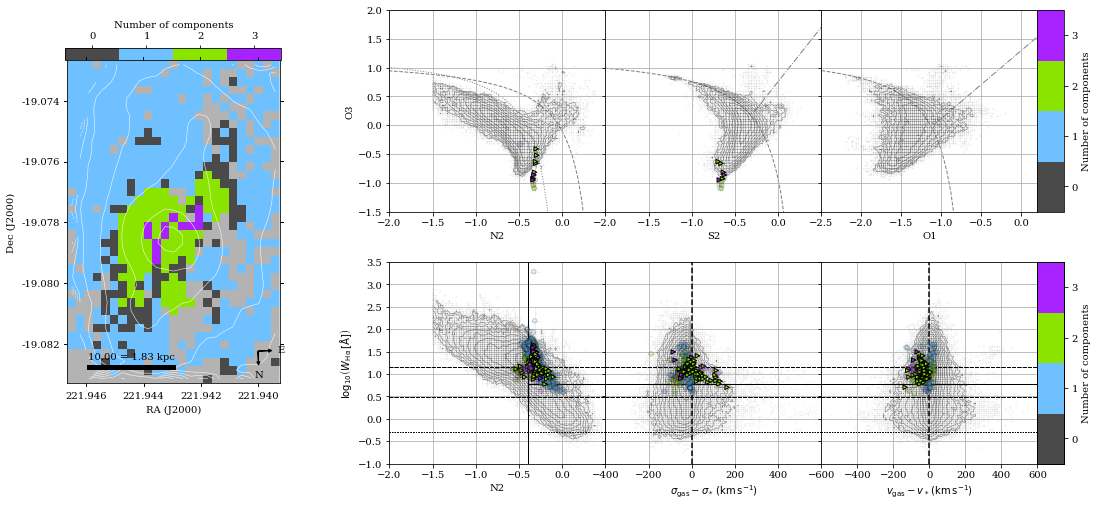

In [6]:
###########################################################################
# Set up the figure
###########################################################################
markers = ["o", ">", "D"]
l = 0.05
b = 0.05
dw = 0.1
dh = 0.1
w = (1 - 2 * l - dw) / 4
h = (1 - 2 * b - dh) / 2

###############################################################################
# Create the figure
###############################################################################
fig = plt.figure(figsize=(15, 7))
ax_im = fig.add_axes([l, b + 0.8 * h / 2, w, h * 1.6])
bbox = ax_im.get_position()
cax_im = fig.add_axes([bbox.x0, bbox.y0 + bbox.height, bbox.width, 0.025])
axs_bpt = []
axs_bpt.append(fig.add_axes([l + w + dw, b + h + dh, w, h]))
axs_bpt.append(fig.add_axes([l + w + dw + w, b + h + dh, w, h]))
axs_bpt.append(fig.add_axes([l + w + dw + 2 * w, b + h + dh, w, h]))
cax_bpt = fig.add_axes(([l + w + dw + 3 * w, b + h + dh, 0.025, h]))
axs_whav = []
axs_whav.append(fig.add_axes([l + w + dw, b, w, h]))
axs_whav.append(fig.add_axes([l + w + dw + w, b, w, h]))
axs_whav.append(fig.add_axes([l + w + dw + 2 * w, b, w, h]))
cax_whav = fig.add_axes(([l + w + dw + 3 * w, b, 0.025, h]))

###############################################################################
# Plot the number of components fitted.
###############################################################################
plot2dmap(df_gal=df_gal, bin_type="default", survey="s7",
          PA_deg=float(df_gal["pa"].unique()[0]),
          col_z="Number of components", 
          ax=ax_im, cax=cax_im, cax_orientation="horizontal", show_title=False)

###############################################################################
# Plot BPT diagrams.
###############################################################################
col_z = "Number of components"
col_y = "log O3"
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, 
                       col_x=f"{col_x} (total)",
                       col_y=f"{col_y} (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=axs_bpt[cc], plot_colorbar=False)

    # Add BPT functions
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot S7 measurements
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})"  in df_gal else col_z,
                      marker=markers[ii], ax=axs_bpt[cc], cax=cax_bpt,
                      alpha=1.0 if ii == 1 else 0.2,
                      plot_colorbar=True if ii == 1 and cc == 2 else False)

# Decorations
[ax.grid() for ax in axs_bpt]
[ax.set_ylim([None, 2.0]) for ax in axs_bpt]
[ax.set_xlim([-1.75, None]) for ax in axs_bpt[:-1]]
axs_bpt[-1].set_xlim([-2.5, None])
[ax.set_ylabel("") for ax in axs_bpt[1:]]
[ax.set_yticklabels([]) for ax in axs_bpt[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs_bpt[:-1]]
[ax.collections[0].set_rasterized(True) for ax in axs_bpt]

###############################################################################
# Plot WHAN, WHAV and WHAV* diagrams.
###############################################################################
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
col_z = "Number of components"

# Plot LZIFU measurements
for cc, col_x in enumerate(["log N2", "sigma_gas - sigma_*", "v_gas - v_*"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, col_x=f"{col_x} (total)" if col_x == "log N2" else f"{col_x}",
                       col_y=f"{col_y} (total)" if col_x == "log N2" else f"{col_y}",
                       col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r", ax=axs_whav[cc],
                       plot_colorbar=False)
    # Plot the S7 data
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})"  in df_gal else col_z,
                      marker=markers[ii], ax=axs_whav[cc], cax=cax_whav,
                      alpha=1.0 if ii == 1 else 0.2,
                      plot_colorbar=True if ii == 1 else False)

# Decorations
[ax.grid() for ax in axs_whav]
axs_whav[0].set_xlim([-1.75, None])
[ax.set_ylabel("") for ax in axs_whav[1:]]
[ax.set_yticklabels([]) for ax in axs_whav[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs_whav[:-1]]
[ax.axvline(0, ls="--", color="k") for ax in axs_whav[1:]]

# Save 
if savefigs:
    fig.savefig(os.path.join(fig_path, f"{gal}_summary"))

# 2D maps: H$\alpha$ flux, $v_{\rm gas}$, $\sigma_{\rm gas}$

/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gal["x, y (pixels)"] = list(zip(df_gal["x (projected, arcsec)"] / as_per_px, df_gal["y (projected, arcsec)"] / as_per_px))
/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:112: RuntimeWarning: invalid value encountered in log10
  ax.contour(np.log10(im_B) + 15, linewidths=0.5, colors="white", levels=levels)


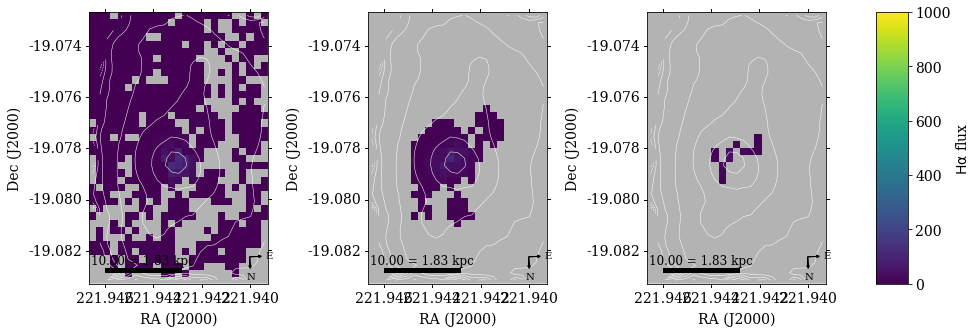

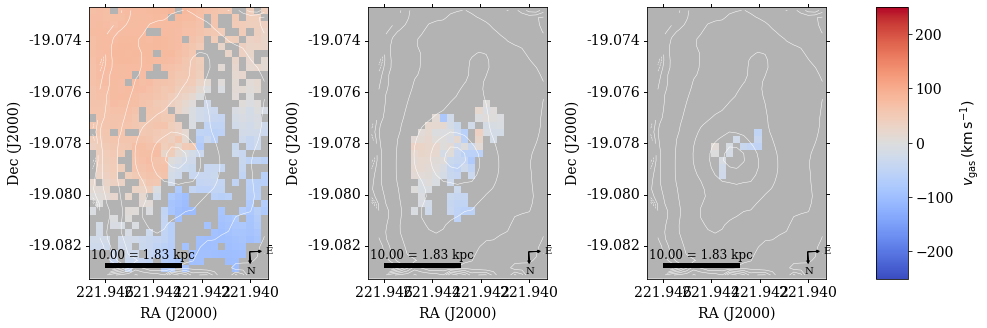

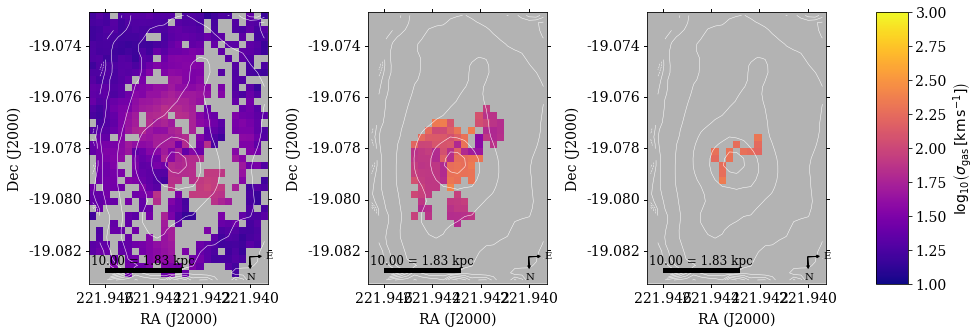

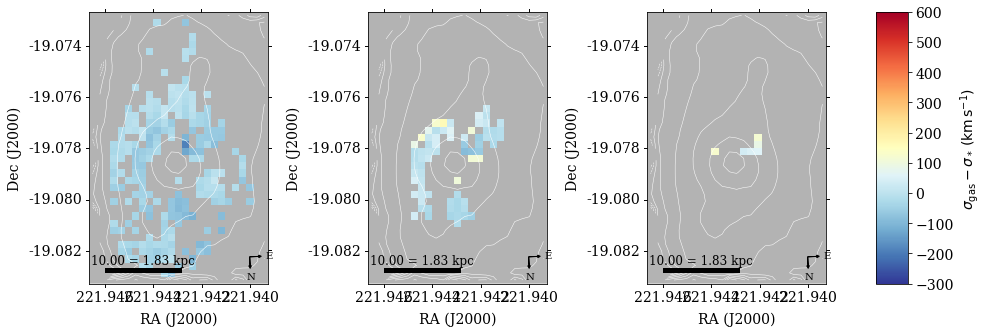

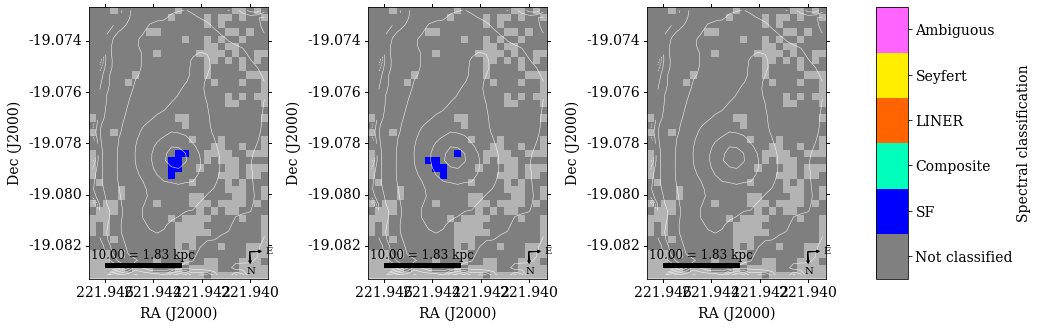

In [112]:
col_z_list = ["HALPHA", "v_gas", "log sigma_gas", "sigma_gas - sigma_*", "BPT (numeric)"]

for col_z in col_z_list:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])
    
    for ii in range(3):
        plot2dmap(df_gal=df_gal, bin_type="default", survey="s7", col_z=f"{col_z} (component {ii})", ax=axs[ii],
                  show_title=False, plot_colorbar=True if ii == 2 else False, cax=cax,
                 PA_deg=float(df_gal["pa"].unique()[0]))



# Optical Diagnostic Diagrams

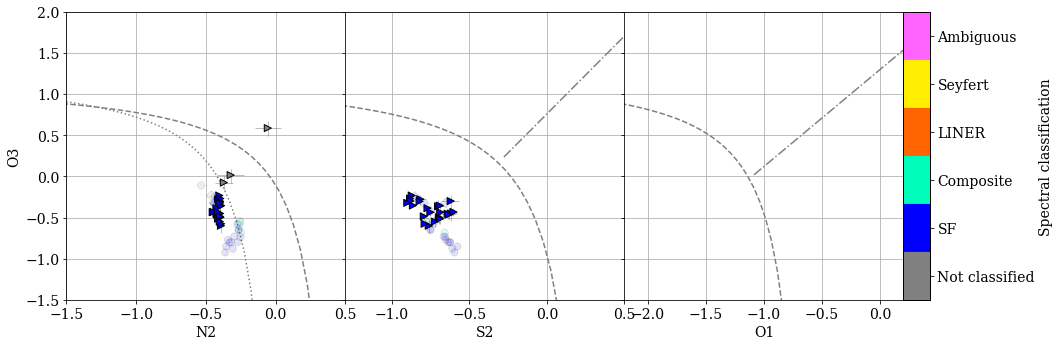

In [109]:
fig, axs, cax = plot_empty_BPT_diagram(nrows=1, colorbar=True)

component_markers = ["o", ">", "D"]

# Plot each component individually
col_y = "log O3"
col_x_list = ["log N2", "log S2", "log O1"]
col_z = "BPT (numeric)"

for cc, col_x in enumerate(col_x_list):
    
    for ii in range(3):
        plot2dscatter(df=df_gal, 
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"{col_z} (component {ii})",
                      ax=axs[cc], marker=component_markers[ii], markersize=50,
                      ymax=2.0, alpha=1.0 if ii == 1 else 0.1,
                      plot_colorbar=True if cc == 2 else False,
                      cax=cax)
        
    # Decorations
    axs[cc].grid()
    axs[cc].set_ylabel("") if cc > 0 else None


# WHAV* diagrams

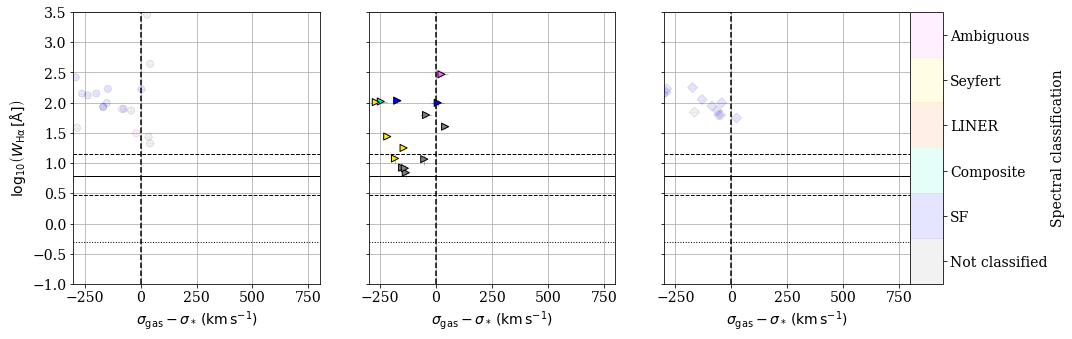

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

component_markers = ["o", ">", "D"]

# Plot each component individually
col_y = "log HALPHA EW"
col_x = "sigma_gas - sigma_*"
col_z = "BPT (numeric)"
    
for ii in range(3):
    plot2dscatter(df=df_gal, 
                  col_x=f"{col_x} (component {ii})",
                  col_y=f"{col_y} (component {ii})",
                  col_z=f"{col_z} (component {ii})",
                  ax=axs[ii], marker=component_markers[ii], markersize=50,
                  xmax=800, alpha=1.0 if ii == 1 else 0.1,
                  plot_colorbar=True if ii == 2 else False,
                  cax=cax)

    # Decorations
    axs[ii].axvline(0, linestyle="--", color="k")
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None


# EW(H$\alpha$) vs. $v_{\rm gas} - v_*$

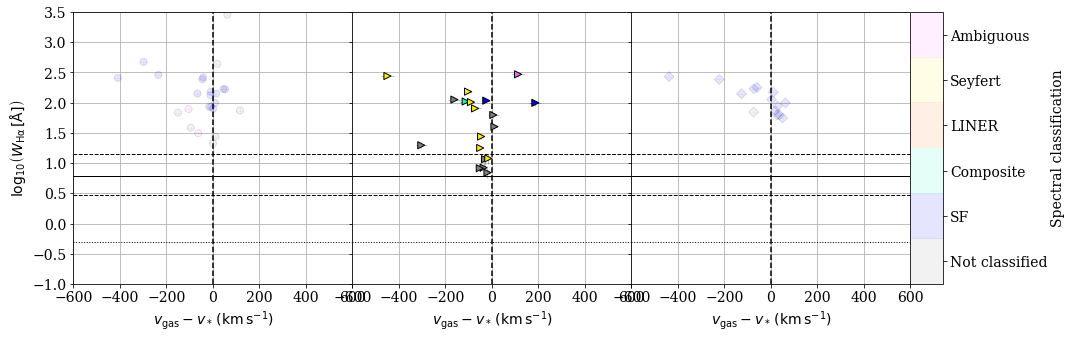

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

component_markers = ["o", ">", "D"]

# Plot each component individually
col_y = "log HALPHA EW"
col_x = "v_gas - v_*"
col_z = "BPT (numeric)"
    
for ii in range(3):
    plot2dscatter(df=df_gal, 
                  col_x=f"{col_x} (component {ii})",
                  col_y=f"{col_y} (component {ii})",
                  col_z=f"{col_z} (component {ii})",
                  ax=axs[ii], marker=component_markers[ii], markersize=50,
                  alpha=1.0 if ii == 1 else 0.1,
                  plot_colorbar=True if ii == 2 else False,
                  cax=cax)

    # Decorations
    axs[ii].axvline(0, linestyle="--", color="k")
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None


# WHAV* diagram by BPT category shown for the entire S7 sample

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/home/u5708159/python/Modules/spaxelsleuth/plotting/plotgalaxies.py:177: UserWarning: No contour levels were found within the data range.
  linewidths=

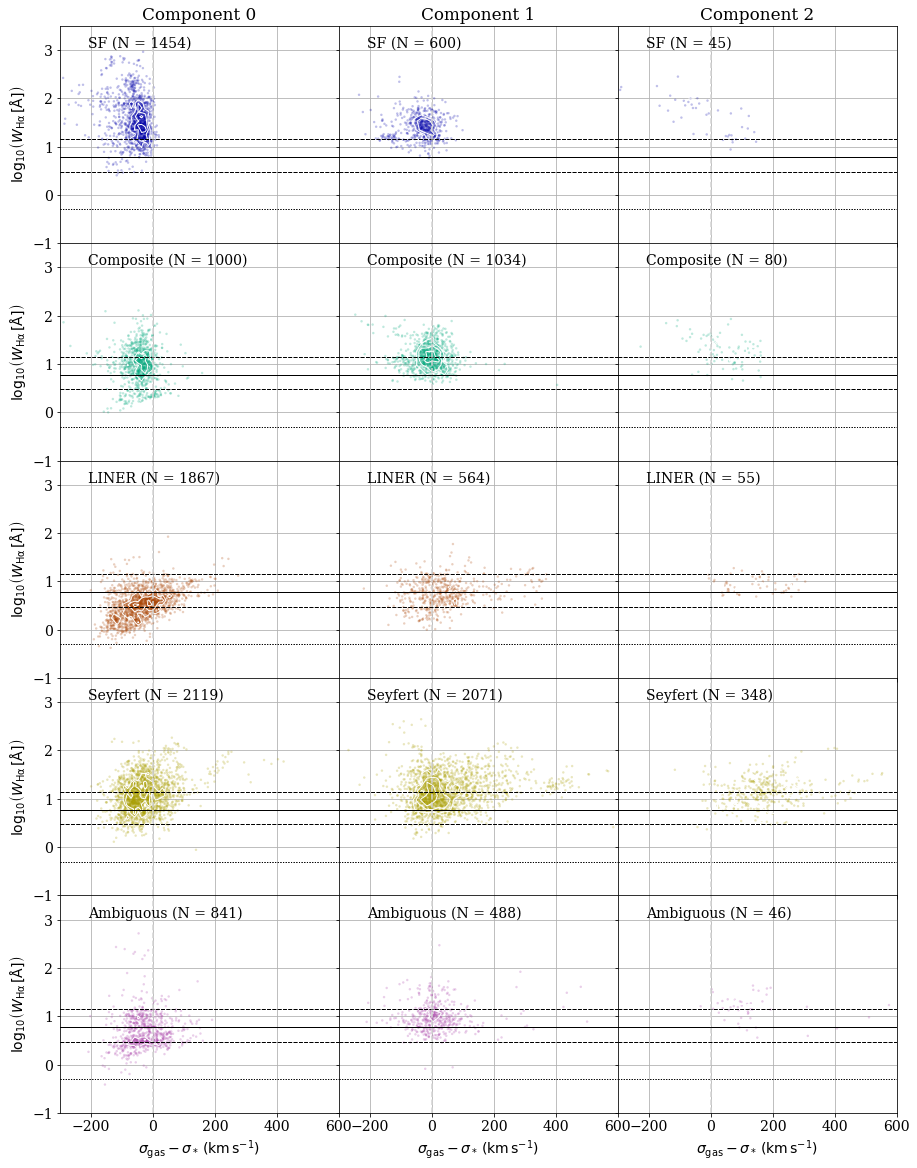

In [80]:
###############################################################################
# WHAV diagram (scatter) - BPT classifications
###############################################################################
col_z = "count"
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"

fig, axs_all = plt.subplots(nrows=len(bpt_labels[1:]), ncols=3, figsize=(5 * 3, 4 * len(bpt_labels[1:])), sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)
xmax_list = [250, 600, 600]

for rr, (axs, bpt) in enumerate(zip(axs_all, bpt_labels[1:])): 
    # recom components
    for ii in range(3):
        cond = df[f"BPT (component {ii})"] == bpt
        cond &= ~np.isnan(df[f"{col_x} (component {ii})"]) & ~np.isnan(df[f"{col_y} (component {ii})"])
        df_subset = df[cond]
        plot2dscatter(df_subset, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=None, errorbars=False,
                              alpha=0.25, ax=axs[ii],
                              xmin=-300, xmax=xmax_list[ii],
                              markersize=6, markerfacecolour=bpt_colours[rr + 1] / 1.5, edgecolors="none", zorder=1,
                              plot_colorbar=False)
        points = axs[ii].collections[0]
        points.set_rasterized(True)
        plot2dhistcontours(df_subset, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=col_z, log_z=False,
                              alpha=1.0, ax=axs[ii], nbins=50, xmin=-300, xmax=xmax_list[ii],
                              linewidths=1, levels=np.logspace(1, 3, 10),
                              contours=True, hist=False, colors="white",
                              plot_colorbar=False)
        # Decorations
        axs[ii].grid()
        axs[ii].axvline(0, linestyle="--", color="lightgrey") if col_x == "sigma_gas - sigma_*" else None
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(bpt_labels[1:]) - 2 else None
#             axs[ii].set_xticklabels([]) if rr < len(bpt_labels[1:]) - 2 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None
        axs[ii].text(s=f"{bpt} (N = {df_subset.shape[0]})", x=0.1, y=0.9, horizontalalignment="left", transform=axs[ii].transAxes)

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"WHAV_star_{bin_type}_{ncomponents}_individual_BPT"), bbox_inches="tight")
